In [31]:
from sklearn.datasets import fetch_openml
m = fetch_openml('mnist_784', as_frame = False)
m.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [32]:
print(m.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [33]:
X, y = m['data'], m['target']
X.shape

(70000, 784)

In [34]:
y.shape

(70000,)

5

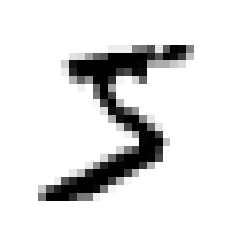

In [35]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


y= y.astype(np.uint8)
sd = X[0]
sdi = sd.reshape(28,28)
plt.imshow(sdi, cmap = mpl.cm.binary)
plt.axis('off')

y[0]

In [36]:
def pd(d):
  i = d.reshape(28,28)
  plt.imshow(i, cmap = mpl.cm.binary, interpolation= 'nearest')
  plt.axis('off')
  
def pds(i,ir= 10, **options):
  s = 28
  ir = min(len(i),ir)
  nr = (len(i)-1)//ir +1
  ne = nr * ir - len(i)
  pi = np.concatenate([i,np.zeros((ne,s*s))], axis = 0)

  ig = pi.reshape((nr,ir,s,s))
  bi = ig.transpose(0,2,1,3).reshape(nr*s, ir*s)
  plt.imshow(bi, cmap = mpl.cm.binary, **options)
  plt.axis('off')

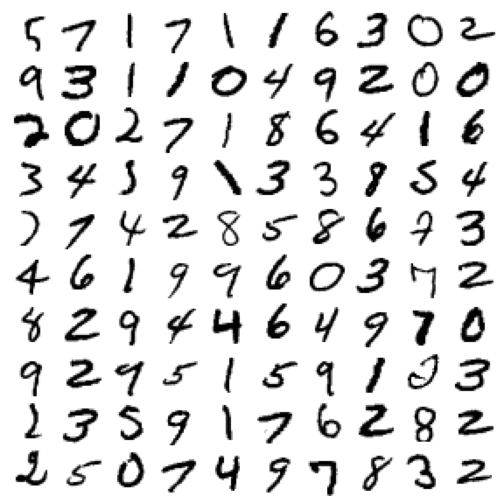

In [37]:
plt.figure(figsize = (9,9))
ei = X[100:200]
pds(ei)

In [38]:
a,d,s,f = X[:60000],X[60000:],y[:60000],y[60000:]

### Binary Classifier

In [39]:
s5 = (s == 5)
f5 = (f == 5)

In [40]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(max_iter= 1000, tol = 1e-3, random_state = 9)
sc.fit(a,s5)

SGDClassifier(random_state=9)

In [41]:
sc.predict([sd])

array([ True])

In [42]:
from sklearn.model_selection import cross_val_score

cross_val_score(sc, a, s5, cv = 3, scoring = 'accuracy')

array([0.962  , 0.96535, 0.96495])

### Performance measure

In [43]:
from sklearn.base import BaseEstimator

class n5c(BaseEstimator):
  def fit(self, X, y = None):
    pass
  def predict(self,X):
    return np.zeros((len(X),1), dtype= bool)

In [44]:
nfc = n5c()
cross_val_score(nfc, a, s5, cv = 3, scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

Confusion matrix

In [45]:
from sklearn.model_selection import cross_val_predict

g = cross_val_predict(sc,a,s5,cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(s5,g)

array([[54079,   500],
       [ 1654,  3767]])

In [46]:
s5p = s5

confusion_matrix(s5,s5p)

array([[54579,     0],
       [    0,  5421]])

### Precision and Recall

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision_score\t:',precision_score(s5,g))
print('recall_score\t:',recall_score(s5,g))
print('f1_score\t:',f1_score(s5,g))

precision_score	: 0.8828216545582377
recall_score	: 0.6948902416528315
f1_score	: 0.77766308835673


precision/recall trade-off

In [53]:
ys = sc.decision_function([sd])
ys

array([5259.85881502])

In [54]:
t = 0
ys > t

array([ True])

In [55]:
t = 8000
ys > t

array([False])

In [56]:
ys = cross_val_predict(sc, a,s5, cv = 3, method = 'decision_function')

In [57]:
from sklearn.metrics import precision_recall_curve

p,r,t = precision_recall_curve(s5,ys)

precision/recall vs threshold

In [65]:
def rt(p,r,t):
  plt.plot(t,p[:-1],'b--',label = 'precision', linewidth = 2)
  plt.plot(t,r[:-1],'g-',label = 'recall', linewidth = 2)

  plt.legend(loc = 'center right', fontsize = 16)
  plt.xlabel('threshold', fontsize = 16)
  plt.grid(True)
  plt.axis([-50000,50000,0,1])

In [66]:
r90 = r[np.argmax(p >= 0.9)]
t90 = t[np.argmax(p >= 0.9)]

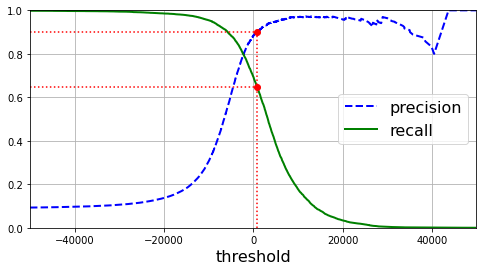

In [67]:
plt.figure(figsize = (8,4))
rt(p,r,t)

plt.plot([t90,t90],[0.,0.9],'r:')
plt.plot([-50000,t90],[.9,.9],'r:')
plt.plot([-50000,t90],[r90,r90],'r:')

plt.plot([t90],[0.9],'ro')
plt.plot([t90],[r90],'ro')

precision vs recall

In [68]:
def pr(p,r):
  plt.plot(r,p,'b-',linewidth=2)
  plt.xlabel('recall',fontsize = 16)
  plt.ylabel('precision',fontsize = 16)
  plt.axis([0,1,0,1])
  plt.grid(True)

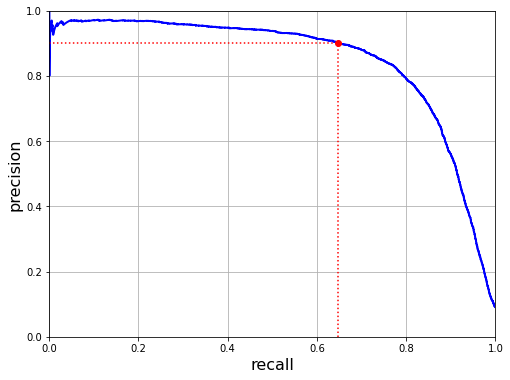

In [70]:
plt.figure(figsize = (8,6))
pr(p,r)

plt.plot([r90,r90],[.0,.9],'r:')
plt.plot([.0,r90],[.9,.9],'r:')
plt.plot([r90],[.9],'ro')

In [72]:
t90 = t[np.argmax(p>=.9)]
t90

845.0165241596723

In [75]:
g90 = (ys>=t90)

print('precision_score\t:',precision_score(s5,g90))
print('recall_score\t:',recall_score(s5,g90))

precision_score	: 0.9000768639508071
recall_score	: 0.6480354178195905


ROC curve

In [76]:
from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(s5,ys)

In [77]:
def rocc(fp,tp,l = None):
  plt.plot(fp,tp, linewidth =2, label = l)
  plt.plot([0,1],[0,1],'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('false positive rate', fontsize = 16)
  plt.ylabel('true positive rate', fontsize = 16)
  plt.grid(True)

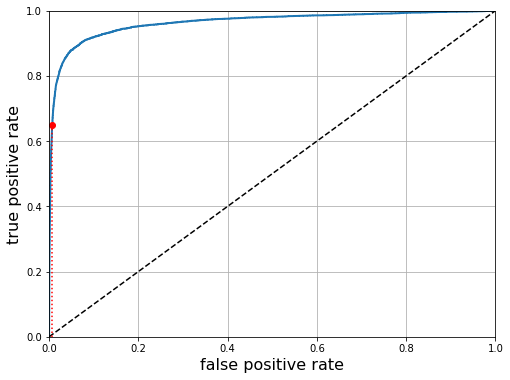

In [80]:
f90 = fp[np.argmax(tp>=r90)]

plt.figure(figsize = (8,6))
rocc(fp,tp)

plt.plot([f90,f90],[.0,r90],'r:')
plt.plot([.0,f90],[r90,r90],'r:')
plt.plot([f90],[r90],'ro')

In [81]:
from sklearn.metrics import roc_auc_score

roc_auc_score(s5,ys)

0.9634515524965919

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, random_state = 9)
ypf = cross_val_predict(rf, a,s5, cv = 3, method = 'predict_proba')
ysf = ypf[:,1]
fpf,tpf,thf = roc_curve(s5,ysf)

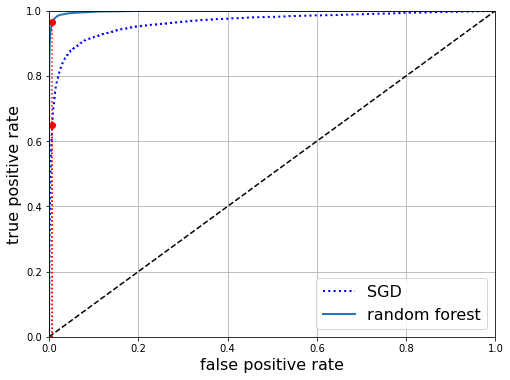

In [86]:
rff = tpf[np.argmax(fpf>=f90)]

plt.figure(figsize = (8,6))
plt.plot(fp,tp,'b:', linewidth = 2, label = 'SGD')
rocc(fpf,tpf,'random forest')

plt.plot([f90,f90],[0.,r90],'r:')
plt.plot([0.,f90],[r90,r90],'r:')
plt.plot([f90],[r90],'ro')
plt.plot([f90,f90],[0.,rff],'r:')
plt.plot([f90],[rff],'ro')

plt.legend(loc = 'lower right', fontsize = 16)

In [87]:
roc_auc_score(s5,ysf)

0.9982299080125859

In [88]:
gf = cross_val_predict(rf, a, s5, cv = 3)

print('precision_score\t:',precision_score(s5,gf))
print('recall_score\t:',recall_score(s5,gf))

precision_score	: 0.9895090222408729
recall_score	: 0.8699501936912009


Multiclass classification

In [89]:
from sklearn.svm import SVC

svc = SVC(gamma = 'auto', random_state = 9)
svc.fit(a[:1000],s[:1000])
svc.predict([sd])

array([5], dtype=uint8)

In [91]:
scores = svc.decision_function([sd])
scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [94]:
np.argmax(scores)

5

In [95]:
svc.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [96]:
from sklearn.multiclass import OneVsRestClassifier

orc = OneVsRestClassifier(SVC(gamma = 'auto', random_state = 9))
orc.fit(a[:1000],s[:1000])
orc.predict([sd])

array([5], dtype=uint8)

In [97]:
len(orc.estimators_)

10

In [99]:
sc.fit(a[:1000],s[:1000])
sc.predict([sd])

array([5], dtype=uint8)

In [100]:
sc.decision_function([sd])

array([[-6137870.08657556, -4348211.53763057, -3907947.84675488,
         -482295.37877108, -7850593.11950632,   746082.71178464,
        -9905490.27918794, -2974173.89161886, -3465643.05970237,
        -4455243.44503332]])

### Error Analysis

In [104]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ass = ss.fit_transform(a.astype(np.float64))
g = cross_val_predict(sc, ass,s, cv =3)
cm = confusion_matrix(s,g)
cm

array([[5583,    0,   24,    7,    9,   44,   36,    6,  213,    1],
       [   0, 6407,   37,   26,    4,   44,    4,    8,  198,   14],
       [  26,   27, 5241,   95,   72,   27,   69,   38,  356,    7],
       [  23,   18,  119, 5249,    2,  203,   27,   41,  377,   72],
       [  11,   15,   47,    9, 5208,   11,   36,   25,  314,  166],
       [  28,   16,   29,  168,   55, 4457,   78,   16,  512,   62],
       [  31,   16,   44,    2,   43,   95, 5556,    5,  125,    1],
       [  20,   11,   52,   31,   49,   11,    3, 5700,  171,  217],
       [  17,   67,   47,   93,    3,  125,   27,   10, 5419,   43],
       [  23,   19,   31,   67,  117,   35,    1,  177,  347, 5132]])

In [105]:
def pcm(cm):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm)
  fig.colorbar(cax)

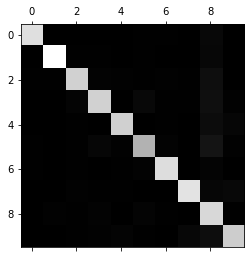

In [107]:
plt.matshow(cm, cmap = plt.cm.gray);

In [109]:
rs = cm.sum(axis = 1, keepdims = True)
ncm = cm/rs

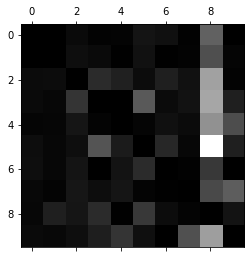

In [110]:
np.fill_diagonal(ncm, 0)
plt.matshow(ncm, cmap = plt.cm.gray)

In [116]:
cla = 8
clb = 5

xaa = a[(s==cla)&(g==cla)]
xab = a[(s==cla)&(g==clb)]
xba = a[(s==clb)&(g==cla)]
xbb = a[(s==clb)&(g==clb)]

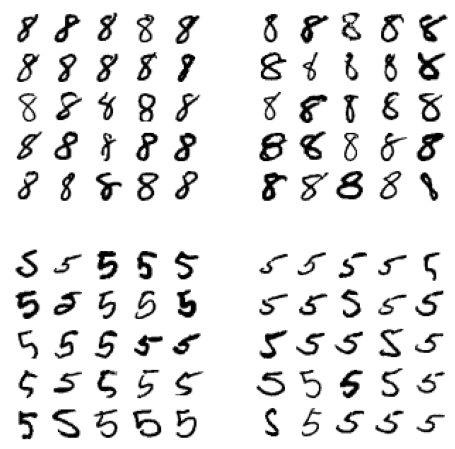

In [117]:
plt.figure(figsize = (8,8))
plt.subplot(221);pds(xaa[:25],ir = 5)
plt.subplot(222);pds(xab[:25],ir = 5)
plt.subplot(223);pds(xba[:25],ir = 5)
plt.subplot(224);pds(xbb[:25],ir = 5)

### Multilabel classification

In [118]:
from sklearn.neighbors import KNeighborsClassifier

sl = (s >= 7)
so = (s%2 == 1)
ym = np.c_[sl,so]

kn = KNeighborsClassifier()
kn.fit(a,ym)

KNeighborsClassifier()

In [119]:
kn.predict([sd])

array([[False,  True]])

In [ ]:
gk = cross_val_predict(kn, a, ym, cv = 3)
f1_score(ym, gk, average = 'macro')

Multioutput classification

In [123]:
n = np.random.randint(0,100, (len(a), 784))
am = a+n
n = np.random.randint(0,100, (len(d), 784))
dm = d+n
sm = a
fm = d

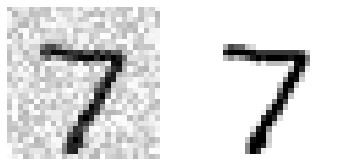

In [130]:
si = 0
plt.subplot(121);pd(dm[si])
plt.subplot(122);pd(fm[si])

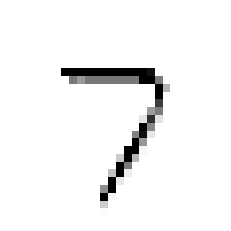

In [132]:
kn.fit(am,sm)
cd = kn.predict([d[si]])
pd(cd)

### KNN classifier

In [134]:
from sklearn.neighbors import KNeighborsClassifier

kc = KNeighborsClassifier(weights = 'distance', n_neighbors = 4)
kc.fit(a,s)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [135]:
h = kc.predict(d)

from sklearn.metrics import accuracy_score

accuracy_score(f,h)

0.9714

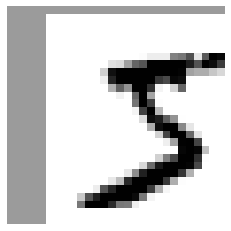

In [136]:
from scipy.ndimage.interpolation import shift

def shd(da,dx,dy,new = 0):
  return shift(da.reshape(28,28),[dy,dx], cval = new).reshape(784)

pd(shd(sd,5,1,new = 100))

In [138]:
ae = [a]
se = [s]

for dx,dy in (1,0),(-1,0),(0,1),(0,-1):
  si = np.apply_along_axis(shd, axis = 1, arr = a, dx = dx, dy = dy)
  ae.append(si)
  se.append(s)

ae = np.concatenate(ae)
se = np.concatenate(se)
ae.shape,se.shape

((300000, 784), (300000,))

In [139]:
kc.fit(ae,se)
h = kc.predict(d)
accuracy_score(f,h)

0.9763

In [142]:
ad = d[2589]
kc.predict_proba([ad])

array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

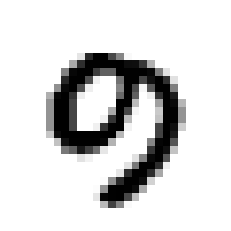

In [141]:
pd(ad)